In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing the data**

In [2]:
train_feature = pd.read_csv('training_set_features.csv')
train_label =  pd.read_csv('training_set_labels.csv')
test_feature =  pd.read_csv('test_set_features.csv')

**Merging of data**
we could also use the merge feature by passing the respondant id as on parameter 

In [4]:
train_feature = pd.concat([train_feature,train_label], axis='columns')
train_feature.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [13]:
train_feature.shape

(26707, 39)

**Dropping unnecessary columns as well as duplicates and the rows which have all entries as null**

In [7]:
train_feature.isna().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
train_feature.drop_duplicates()


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,26702,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,26703,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,26704,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,26705,0,0


In [10]:
train_feature.shape

(26707, 39)

In [5]:
train_feature.drop(['respondent_id', 'employment_industry','employment_occupation','hhs_geo_region'],axis=1, inplace=True)

<Axes: >

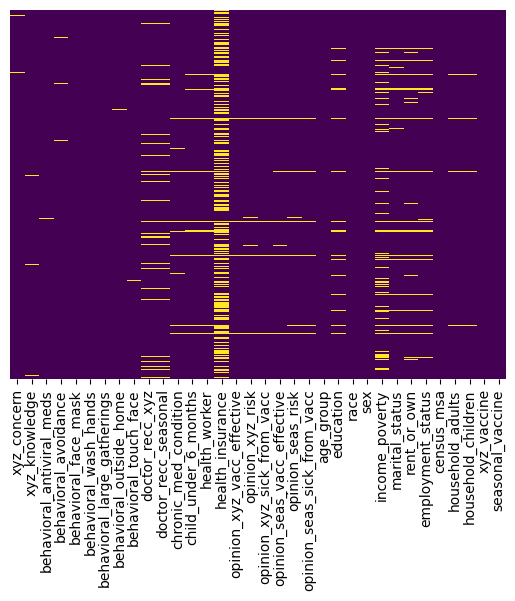

In [6]:
sns.heatmap(train_feature.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Data imputation and labelling**
Here we first divide the data into features and target variable and then we made a function to convert all the columns with str datatype to categorical integers 
Then we made a imputer function and filled all the missing values with most frequent values of that column 

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
feature_cols =train_feature.drop(['xyz_vaccine','seasonal_vaccine'] , axis = 'columns')
target_cols = train_feature[['xyz_vaccine','seasonal_vaccine']]

In [21]:
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [22]:
encode_missing_columns(train_feature,'age_group' )
encode_missing_columns(train_feature,'education' )
encode_missing_columns(train_feature,'race' )
encode_missing_columns(train_feature, 'sex')
encode_missing_columns(train_feature, 'income_poverty' )
encode_missing_columns(train_feature, 'marital_status' )
encode_missing_columns(train_feature, 'rent_or_own')
encode_missing_columns(train_feature, 'employment_status')
encode_missing_columns(train_feature, 'census_msa'  )

In [24]:
# Continuous columns
cont_cols = [
    'xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds', 
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
    'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 
    'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition', 
    'child_under_6_months', 'health_worker', 'opinion_xyz_vacc_effective', 
    'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 
    'household_children'
]

# Categorical columns
cat_cols = [
    'age_group', 'education', 'race', 'sex', 'income_poverty', 
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 
    'census_msa'
]

In [25]:
train_feature.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,2.0,1.0,0.0,1.0,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,2.0,1.0,1.0,0.0,0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,0.0,1.0,0.0,0.0,0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,2.0,1.0,1.0,1.0,1,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0


In [26]:

train_feature_simple_imputer = train_feature.copy()
from sklearn.impute import SimpleImputer

# Extract feature column names by dropping the target columns
feature_cols = train_feature.drop(['xyz_vaccine', 'seasonal_vaccine'], axis=1).columns

# Separate the target columns
target_cols = train_feature[['xyz_vaccine', 'seasonal_vaccine']]

# Initialize KNNImputer
knn = SimpleImputer(strategy='most_frequent')

# Impute the feature columns
train_feature_simple_imputer[feature_cols] = knn.fit_transform(train_feature[feature_cols])

In [27]:
train_feature_simple_imputer.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_

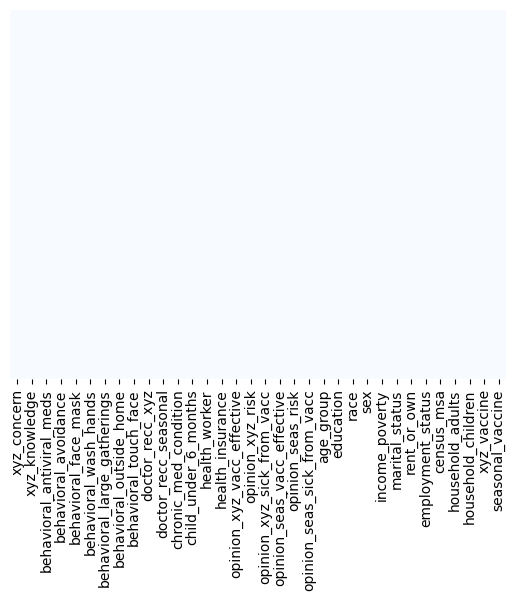

In [28]:
sns.heatmap(train_feature_simple_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_feature_simple_imputer.columns);

**Dimension reduction**
We hereby selected the columns that are most significantly affecting our target variables on the basis of the correlation matrix values 
These columns are different for both the target variables

In [58]:
train_feature = train_feature_simple_imputer

In [29]:
df = train_feature_simple_imputer.copy()

In [30]:
df.corr()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
xyz_concern,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,...,-0.127503,0.046844,-0.028045,0.000714,0.055753,0.004215,-0.016079,0.049441,0.121574,0.154488
xyz_knowledge,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,...,-0.067567,-0.018002,-0.108783,-0.108313,-0.118124,-0.060630,0.023866,0.053378,0.117771,0.119779
behavioral_antiviral_meds,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,...,-0.006196,0.061054,0.005924,0.056575,0.000885,0.012176,0.044829,0.083090,0.040226,0.006013
behavioral_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,...,-0.112591,0.016870,-0.045367,-0.028909,0.022550,-0.032665,0.017995,0.038977,0.046837,0.076130
behavioral_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,...,-0.049912,0.038494,0.001622,0.043492,0.027248,-0.003851,0.014191,0.004794,0.070413,0.050020
behavioral_wash_hands,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,...,-0.157033,0.023675,-0.041226,-0.017509,0.001039,-0.016584,0.009367,0.047451,0.074570,0.112254
behavioral_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,...,-0.055871,0.015420,0.025476,0.047477,0.132775,0.037169,-0.030994,-0.009126,0.018089,0.063722
behavioral_outside_home,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,...,-0.039100,0.034265,0.024708,0.063544,0.138451,0.028633,-0.026542,-0.008937,0.022080,0.053287
behavioral_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,...,-0.162693,0.003681,-0.027781,-0.017302,0.029249,0.004741,-0.001233,0.023739,0.070855,0.119925
doctor_recc_xyz,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,...,-0.041331,0.027327,-0.020290,0.001887,0.019265,-0.007640,0.009081,0.029398,0.394086,0.198560


In [31]:
x1 = df[['doctor_recc_xyz','opinion_xyz_vacc_effective','opinion_seas_vacc_effective','health_worker','xyz_concern','xyz_knowledge','doctor_recc_seasonal','opinion_xyz_risk','opinion_seas_risk','chronic_med_condition']]

In [32]:
x2 = df[['xyz_concern','doctor_recc_xyz','doctor_recc_seasonal','chronic_med_condition','health_insurance','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_seas_vacc_effective','opinion_seas_risk','age_group']]

In [33]:
y = df['xyz_vaccine']
z = df['seasonal_vaccine']

**Dividing the data into training and testing values**

In [34]:
train_x1, test_x1, train_y,test_y = train_test_split(x1,y, test_size=0.20, random_state=42)



In [35]:
train_x2, test_x2, train_z,test_z = train_test_split(x2,y, test_size=0.20, random_state=42)



**Importing important libraries**

In [61]:
final_rf_model = RandomForestClassifier(random_state=42)
from sklearn.linear_model import LogisticRegression


In [48]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from statistics import mode
from statistics import mean


In [41]:
final_rf_model.fit(train_x1, train_y)


RandomForestClassifier(random_state=42)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier



In [69]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
finalknnmodel = KNeighborsClassifier(n_neighbors=5)
finallrmodel = LogisticRegression()

finalknnmodel.fit(train_x1,train_y)


KNeighborsClassifier()

**Now here we used the stack function to increase the accuracy of the model by using the best outputs and predictions**

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.69      0.42      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy on Test dataset by the combined model: 83.68%
precision on Test dataset by the combined model: 68.80%
f1score on Test dataset by the combined model: 0.5198237885462555


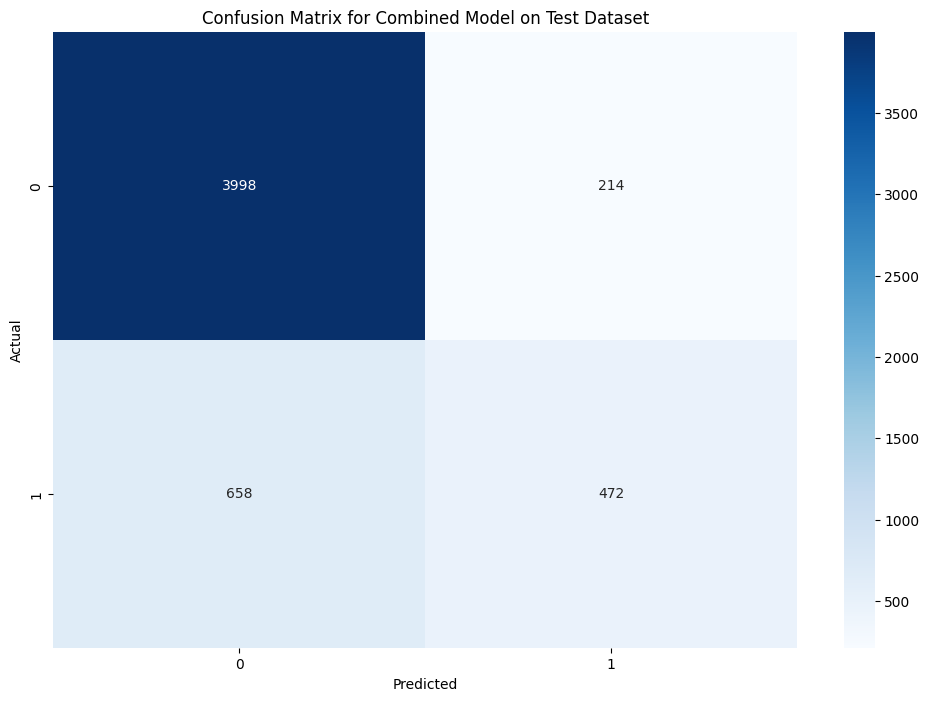

In [71]:
estimatorslist = [
    ('svm', final_svm_model),
    ('randomforest',final_rf_model),
    ('knn',finalknnmodel),
    ('gauss',final_nb_model),
    
]
stack_model = StackingClassifier(
    estimators=estimatorslist, final_estimator=LogisticRegression()
)

stack_model.fit(train_x1, train_y)

final_preds = stack_model.predict(test_x1)


accuracy = accuracy_score(test_y, final_preds)
f1score = f1_score(test_y,final_preds)
precision = precision_score(test_y,final_preds)
print(classification_report(test_y,final_preds))
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")
print(f"precision on Test dataset by the combined model: {precision * 100:.2f}%")
print(f"f1score on Test dataset by the combined model: {f1score}")

# Generating confusion matrix
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Another thing that we noticed here is that our data is doing very well on the 0 values but not so well with 1 values this is due to the impbalance in the dataset i tried
to reduce this difference using smot but it was not working very well for our overall accuracy

**AUC_ROC_score**

In [73]:
prob = stack_model.predict_proba(test_x1)
score = roc_auc_score(test_y, prob[:,1])
score

0.8090783601845549

**Training the model for the second target variable**

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4212
           1       0.67      0.39      0.49      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.67      0.69      5342
weighted avg       0.81      0.83      0.81      5342

Accuracy on Test dataset by the combined model: 82.93%
precision on Test dataset by the combined model: 66.57%
f1score on Test dataset by the combined model: 0.4899328859060403


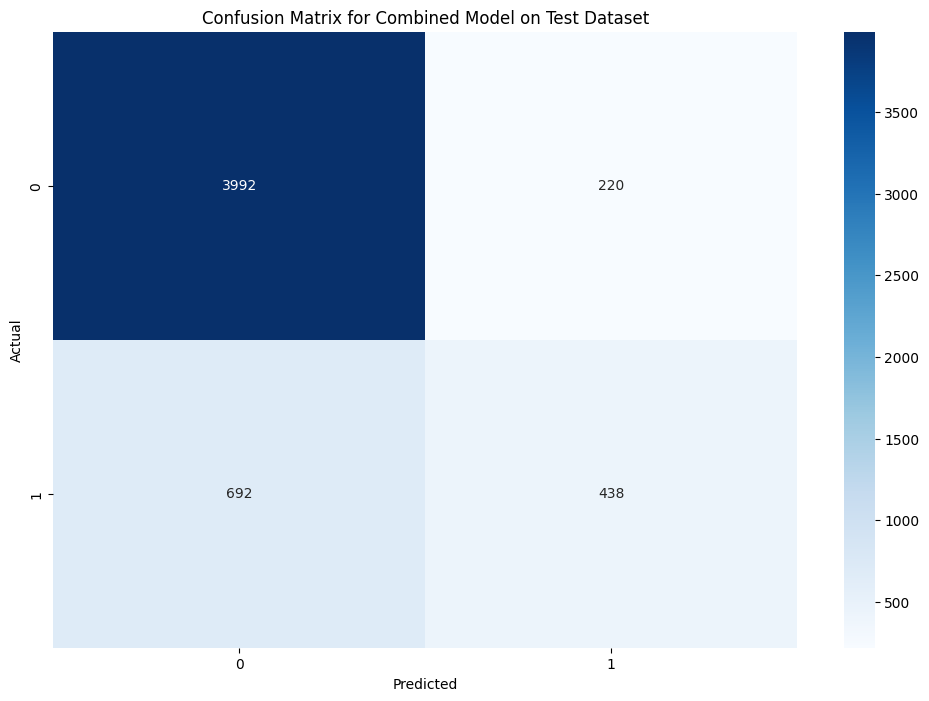

In [74]:


stack_model.fit(train_x2, train_z)

final_preds1 = stack_model.predict(test_x2)


accuracy = accuracy_score(test_z, final_preds1)
f1score = f1_score(test_z,final_preds1)
precision = precision_score(test_z,final_preds1)
print(classification_report(test_z,final_preds1))
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")
print(f"precision on Test dataset by the combined model: {precision * 100:.2f}%")
print(f"f1score on Test dataset by the combined model: {f1score}")

# Generating confusion matrix
cf_matrix = confusion_matrix(test_z, final_preds1)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**AUC_ROC_score**

In [75]:
probability = stack_model.predict_proba(test_x2)

auc_roc = roc_auc_score(test_z, probability[:,1])
auc_roc

0.8066248770894788

**applying all the initial operations that we applied on training features to it**

In [30]:
test_feature.shape

(26708, 36)

In [35]:
test_feature.isna().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [31]:
test_feature.drop_duplicates()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [76]:
test_feature.drop( ['respondent_id', 'employment_industry','employment_occupation','hhs_geo_region'],axis=1, inplace=True)

<Axes: >

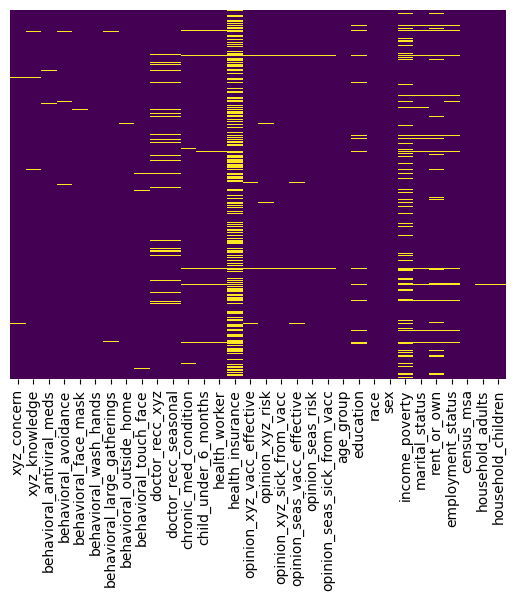

In [77]:
sns.heatmap(test_feature.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [39]:
test_feature.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [78]:
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [79]:
encode_missing_columns(test_feature,'age_group' )
encode_missing_columns(test_feature,'education' )
encode_missing_columns(test_feature,'race' )
encode_missing_columns(test_feature, 'sex')
encode_missing_columns(test_feature, 'income_poverty' )
encode_missing_columns(test_feature, 'marital_status' )
encode_missing_columns(test_feature, 'rent_or_own')
encode_missing_columns(test_feature, 'employment_status')
encode_missing_columns(test_feature, 'census_msa'  )

In [48]:
test_feature.isna().sum()

respondent_id                     0
xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                 

In [81]:
test_feature_simple_imputer = test_feature.copy()

feature_cols = test_feature_simple_imputer.columns

# Initialize KNNImputer
knn = SimpleImputer(strategy='most_frequent')

# Impute the feature columns
test_feature_simple_imputer[feature_cols] = knn.fit_transform(test_feature[feature_cols])
topredict1 = test_feature_simple_imputer[['doctor_recc_xyz','opinion_xyz_vacc_effective','opinion_seas_vacc_effective','health_worker','xyz_concern','xyz_knowledge','doctor_recc_seasonal','opinion_xyz_risk','opinion_seas_risk','chronic_med_condition']]
topredict2 = test_feature_simple_imputer[['xyz_concern','doctor_recc_xyz','doctor_recc_seasonal','chronic_med_condition','health_insurance','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_seas_vacc_effective','opinion_seas_risk','age_group']]
feature_cols = test_feature.columns


In [82]:
test_feature_simple_imputer.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_

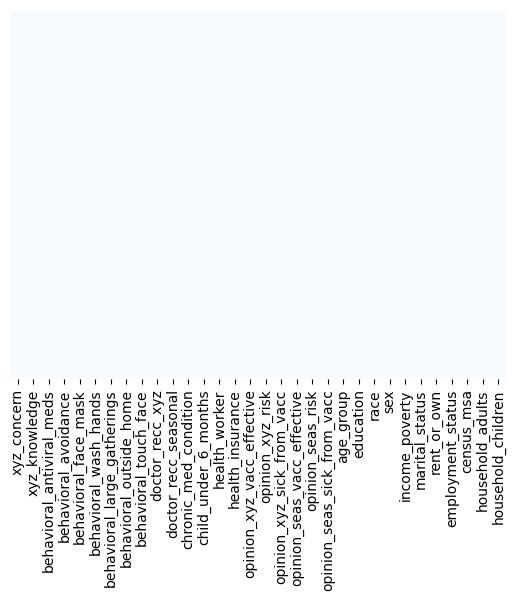

In [83]:
sns.heatmap(test_feature_simple_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_feature_simple_imputer.columns);

**NOw training the model with all the training set and than predicting the value for our test data**

In [84]:

stack_model.fit(x1, y)

final_preds1 = stack_model.predict_proba(topredict1)

final_preds1[:,1]


array([0.09610947, 0.08766764, 0.2890848 , ..., 0.10667206, 0.08085423,
       0.39729546])

In [85]:
xyz_vaccine_dose = pd.DataFrame(final_preds1[:,1], columns=['probability_xyz'])
xyz_vaccine_dose

,probability_xyz
0,0.096109
1,0.087668
2,0.289085
3,0.584087
4,0.314196
...,...
26703,0.281190
26704,0.352620
26705,0.106672
26706,0.080854


In [86]:

stack_model.fit(x2, z)

final_preds2 = stack_model.predict_proba(topredict2)

final_preds2[:,1]


array([0.14427402, 0.12936924, 0.82332556, ..., 0.19548516, 0.32289993,
       0.72262963])

In [87]:
seasonal_vaccine_dose = pd.DataFrame(final_preds2[:,1], columns=['probability_seasonal'])


In [88]:
data1 = pd.read_csv('test_set_features.csv')


**Converting data to dataframe and finally our predictions to csv**

In [89]:
submission = pd.concat([data1['respondent_id'], xyz_vaccine_dose,seasonal_vaccine_dose], axis='columns')
submission
submission.to_csv('submissionfinalchinakshi.csv',index=False)